In [1]:
# Load modules
import os
import papermill as pm
from logger import logger
import scrapbook as sb
import pandas as pd
from ipyfilechooser import FileChooser 

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
   background-color: transparent !important;
}
.jp-OutputArea-output {
   background-color: transparent;
};

### Choose source directory
Select a folder that contains scan images (.img files).

In [3]:
# Choose source folder that contains images (.img files)
fc = FileChooser()
fc.show_only_dirs = True
print("Select a file to load")
# Wait for the user to make a selection
while fc.selected_path == '':
    pass
display(fc)

Select a file to load


FileChooser(path='/Users/kappel/Documents/Programming/python-projects/s04utils', filename='', title='', show_h…

In [4]:
# Set SOURCE_PATH
SOURCE_PATH = "/Users/kappel/Messungen/Setup04/JaKa/post_hack/23_08_07/77K-16nM-eGFP-vitrified/10uW/images/"
#SOURCE_PATH = fc.selected_path

### Choose a notebook to run
This notebook will be run on all image files in the chosen source directory.
In the following, the notebook is hard coded for now.

In [5]:
# Set directory of notebook to run
SOURCE_NOTEBOOK_PATH = 'spot-analysis.ipynb'

In [6]:
# Logging
logger.info("Starting papermill")

# Get list of files with extension .img from SOURCE_PATH
files = [file for file in os.listdir(SOURCE_PATH) if file.endswith(".img")]
print(files)

'''# Iterate over files and run papermill
for file in files:
    logger.info("Running papermill for {}".format(file))
    pm.execute_notebook(
        input_path = SOURCE_NOTEBOOK_PATH,
        output_path = "../s04utils/papermill-test-nbs/papermill-test-{}.ipynb".format(file),
        parameters=dict(
            # join SOURCE_PATH and file name
            SOURCE_IMAGE_PATH = os.path.join(SOURCE_PATH, file)
        )
    )'''

[22/Aug/2023 09:03:59] INFO - Starting papermill
['img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_012.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_006.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_007.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_013.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_005.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_011.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_038.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_010.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_004.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_028.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_014.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpol_015.img', 'img_eGFP_16dot5nm_NaP_100mM_ph7dot5_Treh7dot5_10uW_77K_circpo

'# Iterate over files and run papermill\nfor file in files:\n    logger.info("Running papermill for {}".format(file))\n    pm.execute_notebook(\n        input_path = SOURCE_NOTEBOOK_PATH,\n        output_path = "../s04utils/papermill-test-nbs/papermill-test-{}.ipynb".format(file),\n        parameters=dict(\n            # join SOURCE_PATH and file name\n            SOURCE_IMAGE_PATH = os.path.join(SOURCE_PATH, file)\n        )\n    )'

In [7]:
# Read scraps of notebooks generated by papermill

OUTPUT_PATH = '../s04utils/papermill-test-nbs/'

# Get list of files with extension .ipynb from OUTPUT_PATH and join with sourcepath
notebooks = [os.path.join(OUTPUT_PATH, file) for file in os.listdir(OUTPUT_PATH) if file.endswith(".ipynb")]
print(len(notebooks))


blob_dataframe = pd.DataFrame()

for notebook in notebooks:
    print(notebook)
    nb = sb.read_notebook(notebook)
    if not nb.scrap_dataframe.empty:
        nb_dataframe = nb.scrap_dataframe.loc[nb.scrap_dataframe['name'] == 'blob_dataframe', 'data'].iloc[0]
        blob_dataframe = pd.concat([blob_dataframe, nb_dataframe], ignore_index=True)
        blob_dataframe = pd.concat([blob_dataframe, nb_dataframe], ignore_index=True)




0


In [8]:
blob_dataframe.head()

""


In [9]:
print(blob_dataframe.columns)


RangeIndex(start=0, stop=0, step=1)


In [10]:
blob_dataframe.hist(column='Max. intensity', bins=200, range=(0, 200))
counts = blob_dataframe['Max. intensity'].value_counts()

KeyError: "None of [Index(['Max. intensity'], dtype='object')] are in the [columns]"

array([[<Axes: title={'center': 'Avg. intensity'}>]], dtype=object)

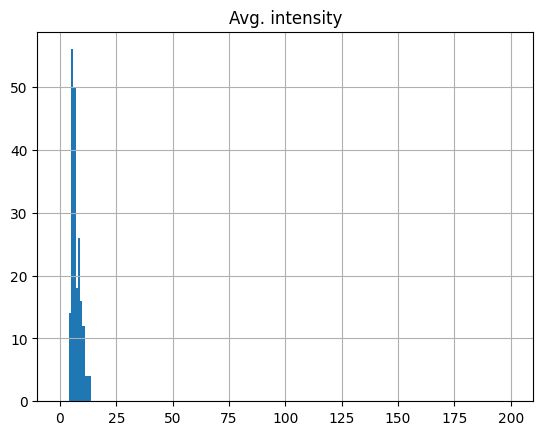

In [ ]:
blob_dataframe.hist(column='Avg. intensity', bins=200, range=(0, 200))

<Axes: ylabel='Frequency'>

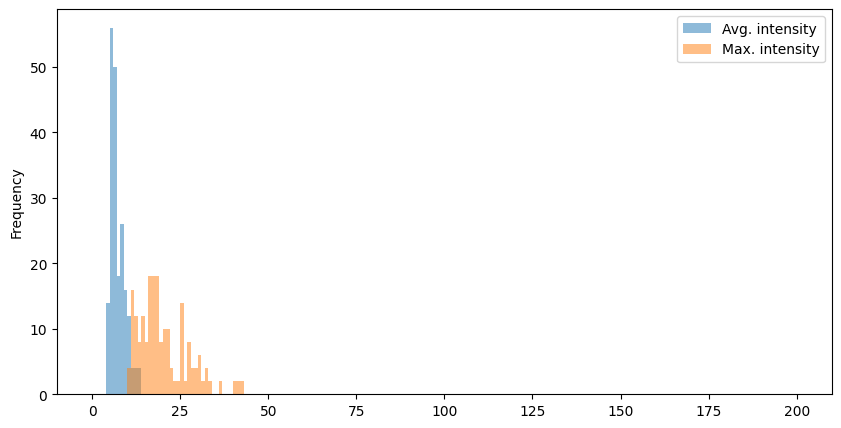

In [ ]:
blob_dataframe[['Avg. intensity', 'Max. intensity']].plot(kind='hist', bins=200, alpha=0.5, figsize=(10, 5), range=(0, 200))

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

r_max_intensities = blob_dataframe['Max. intensity'].values.tolist()
r_avg_intensities = blob_dataframe['Avg. intensity'].values.tolist()

if np.min(r_avg_intensities) >= np.min(r_max_intensities):
    max_bin = np.max(r_avg_intensities)
else:
    max_bin = np.max(r_max_intensities)

print(sorted(r_max_intensities))
print(type(r_max_intensities))

min_val = np.min(r_max_intensities)
max_val = np.max(r_max_intensities)

val_width = max_val - min_val
n_bins = 200
bin_width = val_width/n_bins

# Create barplot for histogram of average intensities
sns.set_style('white')
sns.displot(data=blob_dataframe, 
            bins=n_bins, 
            binrange=(0, 200), 
            kind='hist', 
            kde=True, 
            edgecolor='white', 
            height=5, 
            aspect=2)


# Set axis
plt.xlabel('photons per ms')
plt.ylabel('number of Molecules')
plt.tick_params(axis='both', which='both', bottom=True, left=True)
#plt.xticks(np.arange(min_val-bin_width/2, max_val+bin_width/2, bin_width))
plt.xlim(0, max_bin+20)
plt.show()

NameError: name 'blob_dataframe' is not defined

[19/Aug/2023 21:37:16] INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[19/Aug/2023 21:37:16] INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


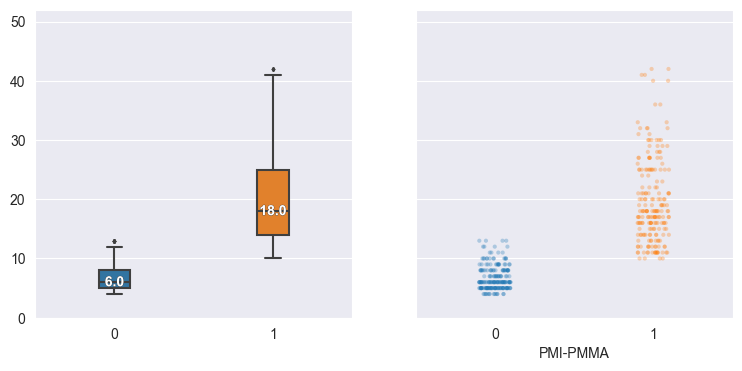

In [ ]:
import matplotlib.patheffects as path_effects

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=0.5, foreground=median.get_color()),
            path_effects.Normal(),
        ])


data = [r_avg_intensities, r_max_intensities]


# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)

# Create the boxplot in the first subplot
sns.set_style('darkgrid')
sns.boxplot(ax = axes[0], data=data, width=0.2, fliersize=2)

# Create the stripplot in the second subplot
ax = sns.stripplot(ax = axes[1], size = 3, alpha = 0.3, data = data, jitter=True)

# Set axis
plt.xlabel('PMI-PMMA')
plt.ylabel('avg. Intensity (photons per ms)')
plt.ylim(0, np.max(r_max_intensities)+10)
add_median_labels(axes[0])
plt.show()
